In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import yfinance as yf

In [3]:
# Coleta da taxa de retorno risk free

def deannualize(annual_rate, periods=365):
    return (1 + annual_rate) ** (1/periods) - 1

annualized = yf.download("^IRX", start="1991-06-01", end="2015-12-31")["Adj Close"]
daily = annualized.apply(deannualize)

# create dataframe
risk_free_rates = pd.DataFrame({"annualized": annualized, "daily": daily})
risk_free_rates['daily'] = risk_free_rates['daily'] / 100
print(np.shape(risk_free_rates))
risk_free_rates.head()

[*********************100%***********************]  1 of 1 completed
(6168, 2)


,annualized,daily
Date,,
1991-06-03,5.60,0.000052
1991-06-04,5.57,0.000052
1991-06-05,5.59,0.000052
1991-06-06,5.56,0.000052
1991-06-07,5.56,0.000052


In [35]:
operations = pd.read_csv("../cointegration_results/operations_test.csv")
operations['Pair'] = operations['Index'].str[:-2]
print(operations.tail())

      Operação  Semestre  Abertura  Fechamento  Dias  Retorno total Ticker 1  \
2536         1        48      6298        6310    12       0.098565      ABT   
2537         2        48      6334        6336     2       0.035842      ABT   
2538         3        48      6403        6414    11       0.062250      ABT   
2539         1        48      6320        6334    14       0.131276       DE   
2540         2        48      6411        6424    13      -0.014710       DE   

     Ticker 2  Converged       Index  Retorno total - exp      Pair  
2536     EBAY       True  ABT-EBAY-1             1.103586  ABT-EBAY  
2537     EBAY       True  ABT-EBAY-2             1.036492  ABT-EBAY  
2538     EBAY       True  ABT-EBAY-3             1.064228  ABT-EBAY  
2539      TSN       True    DE-TSN-1             1.140283    DE-TSN  
2540      TSN      False    DE-TSN-2             0.985397    DE-TSN  


In [38]:
#print(f"Converged operations: {sum(operations['Converged'])} | Open operations: {np.shape(operations)[0] - sum(operations['Converged'])}")
print(f"Número de operações: {np.shape(operations)[0]}")
print(f"Positive Returns: {sum(operations['Retorno total'] > 0)} | Negative: {sum(operations['Retorno total'] < 0)}")
print(f"Highest Return: {operations['Retorno total'].max()}")
print(f"Lowest Return: {operations['Retorno total'].min()}")
print(f"Average Return: {operations['Retorno total'].mean()}")
print(f"Average trade lenght: {operations['Dias'].mean()}")
print(f"Convergência: {(operations['Converged'].sum()/np.shape(operations)[0])*100}")

Número de operações: 2541
Positive Returns: 2133 | Negative: 328
Highest Return: 0.473087447258671
Lowest Return: -0.3093358534634691
Average Return: 0.041952482918907644
Average trade lenght: 11.777253049980322
Convergência: 81.07044470680835


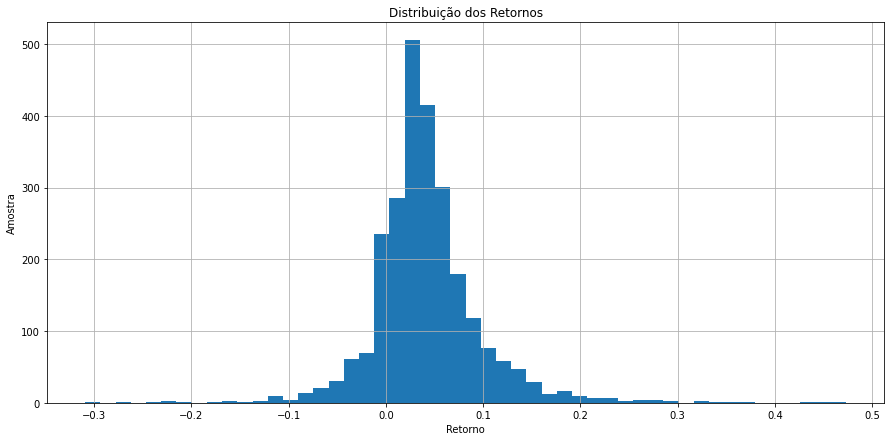

In [29]:
# Return Distribution
fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(1, 1, 1)
operations['Retorno total'].hist(bins=50, ax=ax1)
ax1.set_xlabel('Retorno')
ax1.set_ylabel('Amostra')
ax1.set_title('Distribuição dos Retornos')
plt.show()

In [39]:
# Retorno por par
operations_by_pair = operations.groupby("Pair").sum("Retorno total")
print(f"Número de pares: {np.shape(operations_by_pair)[0]}")
print(f"Retorno médio por par: {round(100*operations_by_pair['Retorno total'].mean(),4)}%")

Número de pares: 973
Retorno médio por par: 10.9559%


In [40]:
# Ações com maior participação
stock_count = {}

for pair in operations_by_pair.index:
    stocks = pair.split("-")
    for stock in stocks:   
        if stock in stock_count:
            stock_count[stock] += 1
        else:
            stock_count[stock] = 1
stock_count_df = pd.DataFrame(stock_count.items()) 
stock_count_df = stock_count_df.sort_values(1)
stock_count_df.to_csv("../cointegration_results/stock_count_20_pairs_test.csv")

Compound interest rate is [12.67004828] %


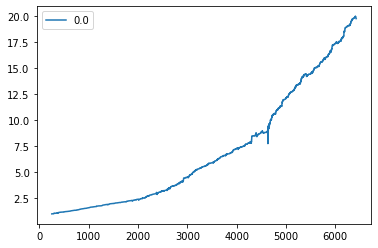

In [39]:
def rate_interest(principal, final_amount, time):
    rate = (100 * (final_amount/principal)**(1/time)) - 100
    print("Compound interest rate is", rate, "%")

daily_returns = pd.read_csv("../cointegration_results/daily_returns_test.csv")
daily_returns = daily_returns.iloc[252:,:]
daily_returns = daily_returns / 35
cumulative = np.cumprod(1+daily_returns)
cumulative.plot()
rate_interest(1,cumulative.values[-1],25)

In [14]:
# Cálculo do Sharpe para o período do estudo
mean_daily_return = daily_returns.values.mean()
print(f"Mean daily return: {mean_daily_return}")
returns_std_dev = daily_returns.values.std()

risk_free_mean = risk_free_rates['daily'].mean()
print(f"Mean risk free return: {risk_free_mean}")

print(f"Fully Invested Sharpe Ratio: {(mean_daily_return - risk_free_mean) / returns_std_dev}")

Mean daily return: 0.0004895250452600951
Mean risk free return: 2.9473073283260452e-05
Fully Invested Sharpe Ratio: 0.1280472917056657


[*********************100%***********************]  1 of 1 completed
(6174,)
Compound interest rate is 7.0254359498750745 %


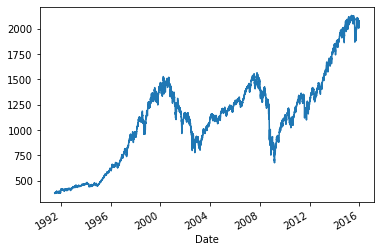

In [19]:
from pandas_datareader import data as pdr
import datetime
import yfinance as yf
yf.pdr_override()

start = datetime.datetime(1991, 7, 1)
end = datetime.datetime(2015, 12, 31)

tickers = ['^GSPC']

data = pdr.get_data_yahoo(tickers, start, end)['Close']
print(np.shape(data))
data.plot()

rate_interest(data.values[0], data.values[-1], 25)

In [26]:
operations_stop_5 = pd.read_csv("../cointegration_results/stop_5/operations.csv", index_col=0)
operations_stop_5['Pair'] = operations_stop_5['Index'].str[:-2]
operations_stop_5.head()
print(f"Número de operações: {np.shape(operations_stop_5)[0]}")
print(f"Positive Returns: {sum(operations_stop_5['Retorno total'] > 0)} | Negative: {sum(operations_stop_5['Retorno total'] < 0)}")
print(f"Highest Return: {operations_stop_5['Retorno total'].max()}")
print(f"Lowest Return: {operations_stop_5['Retorno total'].min()}")
print(f"Average Return: {operations_stop_5['Retorno total'].mean()}")
print(f"Average trade lenght: {operations_stop_5['Dias'].mean()}")
print(f"Convergência: {(operations_stop_5['Converged'].sum()/np.shape(operations_stop_5)[0])*100}")

Número de operações: 2896
Positive Returns: 2158 | Negative: 640
Highest Return: 0.5217699075776943
Lowest Return: -0.0883839099028303
Average Return: 0.03545810318275358
Average trade lenght: 10.136049723756907
Convergência: 83.94337016574586


In [27]:
# Retorno por par
operations_by_pair_stop_5 = operations_stop_5.groupby("Pair").sum("Retorno total")
print(f"Número de pares: {np.shape(operations_by_pair_stop_5)[0]}")
print(f"Retorno médio por par: {round(100*operations_by_pair_stop_5['Retorno total'].mean(),4)}%")

Número de pares: 973
Retorno médio por par: 10.5536%


In [28]:
operations_stop_7 = pd.read_csv("../cointegration_results/stop_7/operations.csv", index_col=0)
operations_stop_7['Pair'] = operations_stop_7['Index'].str[:-2]
operations_stop_7.head()
print(f"Número de operações: {np.shape(operations_stop_7)[0]}")
print(f"Positive Returns: {sum(operations_stop_7['Retorno total'] > 0)} | Negative: {sum(operations_stop_7['Retorno total'] < 0)}")
print(f"Highest Return: {operations_stop_7['Retorno total'].max()}")
print(f"Lowest Return: {operations_stop_7['Retorno total'].min()}")
print(f"Average Return: {operations_stop_7['Retorno total'].mean()}")
print(f"Average trade lenght: {operations_stop_7['Dias'].mean()}")
print(f"Convergência: {(operations_stop_7['Converged'].sum()/np.shape(operations_stop_7)[0])*100}")

Número de operações: 2733
Positive Returns: 2151 | Negative: 492
Highest Return: 0.473087447258671
Lowest Return: -0.0883839099028303
Average Return: 0.03818681424731353
Average trade lenght: 10.840102451518478
Convergência: 82.61983168679107


In [29]:
# Retorno por par
operations_by_pair_stop_7 = operations_stop_7.groupby("Pair").sum("Retorno total")
print(f"Número de pares: {np.shape(operations_by_pair_stop_7)[0]}")
print(f"Retorno médio por par: {round(100*operations_by_pair_stop_7['Retorno total'].mean(),4)}%")

Número de pares: 973
Retorno médio por par: 10.7261%


In [30]:
operations_stop_10 = pd.read_csv("../cointegration_results/stop_10/operations.csv", index_col=0)
operations_stop_10['Pair'] = operations_stop_10['Index'].str[:-2]
operations_stop_10.head()
print(f"Número de operações: {np.shape(operations_stop_10)[0]}")
print(f"Positive Returns: {sum(operations_stop_10['Retorno total'] > 0)} | Negative: {sum(operations_stop_10['Retorno total'] < 0)}")
print(f"Highest Return: {operations_stop_10['Retorno total'].max()}")
print(f"Lowest Return: {operations_stop_10['Retorno total'].min()}")
print(f"Average Return: {operations_stop_10['Retorno total'].mean()}")
print(f"Average trade lenght: {operations_stop_10['Dias'].mean()}")
print(f"Convergência: {(operations_stop_10['Converged'].sum()/np.shape(operations_stop_10)[0])*100}")

Número de operações: 2624
Positive Returns: 2146 | Negative: 394
Highest Return: 0.527502281045868
Lowest Return: -0.119613681814422
Average Return: 0.040970366903023026
Average trade lenght: 11.360518292682928
Convergência: 81.82164634146342


In [31]:
# Retorno por par
operations_by_pair_stop_10 = operations_stop_10.groupby("Pair").sum("Retorno total")
print(f"Número de pares: {np.shape(operations_by_pair_stop_10)[0]}")
print(f"Retorno médio por par: {round(100*operations_by_pair_stop_10['Retorno total'].mean(),4)}%")

Número de pares: 973
Retorno médio por par: 11.0489%


In [32]:
operations_sigma_1 = pd.read_csv("../cointegration_results/threshold_1/operations.csv", index_col=0)
operations_sigma_1['Pair'] = operations_sigma_1['Index'].str[:-2]
operations_sigma_1.head()
print(f"Número de operações: {np.shape(operations_sigma_1)[0]}")
print(f"Positive Returns: {sum(operations_sigma_1['Retorno total'] > 0)} | Negative: {sum(operations_sigma_1['Retorno total'] < 0)}")
print(f"Highest Return: {operations_sigma_1['Retorno total'].max()}")
print(f"Lowest Return: {operations_sigma_1['Retorno total'].min()}")
print(f"Average Return: {operations_sigma_1['Retorno total'].mean()}")
print(f"Average trade lenght: {operations_sigma_1['Dias'].mean()}")
print(f"Convergência: {(operations_sigma_1['Converged'].sum()/np.shape(operations_sigma_1)[0])*100}")
# Retorno por par
operations_sigma_1 = operations_sigma_1.groupby("Pair").sum("Retorno total")
print(f"Número de pares: {np.shape(operations_sigma_1)[0]}")
print(f"Retorno médio por par: {round(100*operations_sigma_1['Retorno total'].mean(),4)}%")

Número de operações: 4242
Positive Returns: 3306 | Negative: 735
Highest Return: 0.5944235105877524
Lowest Return: -0.3576448089750053
Average Return: 0.027633472079606015
Average trade lenght: 14.254125412541255
Convergência: 84.37057991513437
Número de pares: 1013
Retorno médio por par: 11.5717%


In [33]:
operations_sigma_2 = pd.read_csv("../cointegration_results/threshold_2/operations.csv", index_col=0)
operations_sigma_2['Pair'] = operations_sigma_2['Index'].str[:-2]
operations_sigma_2.head()
print(f"Número de operações: {np.shape(operations_sigma_2)[0]}")
print(f"Positive Returns: {sum(operations_sigma_2['Retorno total'] > 0)} | Negative: {sum(operations_sigma_2['Retorno total'] < 0)}")
print(f"Highest Return: {operations_sigma_2['Retorno total'].max()}")
print(f"Lowest Return: {operations_sigma_2['Retorno total'].min()}")
print(f"Average Return: {operations_sigma_2['Retorno total'].mean()}")
print(f"Average trade lenght: {operations_sigma_2['Dias'].mean()}")
print(f"Convergência: {(operations_sigma_2['Converged'].sum()/np.shape(operations_sigma_2)[0])*100}")
# Retorno por par
operations_sigma_2 = operations_sigma_2.groupby("Pair").sum("Retorno total")
print(f"Número de pares: {np.shape(operations_sigma_2)[0]}")
print(f"Retorno médio por par: {round(100*operations_sigma_2['Retorno total'].mean(),4)}%")

Número de operações: 1071
Positive Returns: 913 | Negative: 112
Highest Return: 0.5499908026553171
Lowest Return: -0.2049867237521339
Average Return: 0.05656146740480111
Average trade lenght: 8.721755368814192
Convergência: 77.40429505135388
Número de pares: 766
Retorno médio por par: 7.9083%


In [37]:
operations_by_period = {}
for index, row in operations.iterrows():
    period = int(row['Dias']/10)
    positive_return = row['Retorno total'] >= 0
    operation_return = row['Retorno total']
    if period not in operations_by_period:
        operations_by_period[period] = {"positive": 0, "negative": 0, "return": 0}
    
    if positive_return:
        operations_by_period[period]['positive'] += 1
    else:
        operations_by_period[period]['negative'] += 1
            
    operations_by_period[period]['return'] += operation_return
        
pd.DataFrame(operations_by_period).to_csv("../cointegration_results/duration_limit/operations_period.csv")

In [38]:
operations['Dias'].max()

46